In [9]:
import pandas as pd
import os
from src.dataset import segments_from_audio_file
from src.audio import waveform_to_mfcc, waveform_to_spectrogram
from src.plots import plot_mfccs
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
QUEEN_DIR = './dataset/sbcm_val_big/queen'
NOQUEEN_DIR = "./dataset/sbcm_val_big/noqueen"

In [3]:
def dir_mfccs(dir: str):
    files = os.listdir(dir)
    fm = list()
    for f in files:
        segments = segments_from_audio_file(dir + '/' + f)
        print(f"Found {len(segments)} segments in {f}")
        file_mfccs = list()
        for seg in segments:
            print(f"Processing segment {len(file_mfccs)}")
            mfccs = waveform_to_mfcc(seg)
            file_mfccs.append(mfccs)
        fm.append(file_mfccs)
    return fm

In [3]:
queen_files =  os.listdir(QUEEN_DIR)
noqueen_files = os.listdir(NOQUEEN_DIR)
segments = segments_from_audio_file(QUEEN_DIR + '/' + queen_files[0])

In [4]:
tensor_segments = [tf.convert_to_tensor(seg.get_array_of_samples(), dtype=tf.float32) for seg in segments]

2024-03-02 21:30:00.063725: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-02 21:30:00.063770: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-03-02 21:30:00.063779: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-03-02 21:30:00.063830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-02 21:30:00.063874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
mfcc = waveform_to_mfcc(tensor_segments[0])
print('MFCCs shape:', mfcc.shape)

a
b
513 44100
MFCCs shape: (341, 16)


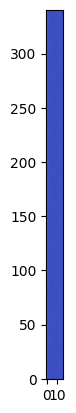

In [6]:

plt.imshow(mfcc,  interpolation='nearest', cmap=cm.coolwarm, origin='lower')